In [1]:


#todo: this is messy as fuck, When I come back leave without scaler, as it performed slightly better without but both still crap ~ 0.33
#? Make not because there isn't a bloody linear relationship between these features, so ohter ML models will b better!
# Onto the next!

# Multiple Linear Regression Analysis

In [1]:
from cleaned import ratings_df
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler 

#? Train and Test split
X = ratings_df[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated',
             'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
             'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
             'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV',
             'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
             'movie', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'video', 'videoGame']]
y = ratings_df['Your Rating']

#todo: Remove all these later cause I'm about to remove them in the exploratory stage!
X = X.dropna() #! Note toe self this drops all x rows with a missing val (runtimes ~ 30)
y = y[X.index] #* This row makes sure after removing that it drops respective y's and make sure still lines up!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


#todo: This is where I need to make user predict function or insert a list of 100 movies to predict!
y_pred = model.predict(X_test_scaled)
# print(y_pred) -- minteresting..



#? Predicting the departed for me!
new_data = pd.DataFrame({
    "IMDb Rating": [8.5],
    "Runtime (mins)": [151],
    "Year": [2006],
    "Num Votes": [1400000],
    "Crime": [1],
    "Drama": [1],
    "Thriller": [1], 
    "movie": [1]
})
#! Try this once new_data ^ includes all features... If I can't figure out how to avoid that..
# new_predict = round(model.predict(new_data), 1)
# print(f"Your predicted rating for The Departed is {new_predict[0]}")

In [2]:
r2_unscaled = model.score(X_test, y_test)

# Evaluate the model with scaling
r2_scaled = model.score(X_test_scaled, y_test)

print("R^2 score without scaling:", r2_unscaled)
print("R^2 score with scaling:", r2_scaled)

R^2 score without scaling: -1.7868512314843734e+25
R^2 score with scaling: 0.3356854472817853


/Users/bencunningham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [3]:
#? Evaluation 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) #* Can use either this one represents the mean diff betwen predicted an actual - makes intuitive sense!
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

#! Extra crap (Residual Anaylsis)
# sorted_coefs = sorted(model.coef_, reverse=True) -- if needed
print(model.coef_)
print(model.intercept_)
print(model.score(X_train, y_train)) #* --- This is good (R^2 best possilbe val = 1, usually 0.7 is good, basically the percentage variation in y explained by all X variable together!
print(model.score(X_test, y_test)) #* Basically both these are crap (Because a lot of these relationships aren't linear!!)
#? Score on train = how well model is trained on data / fits
#? Score on test = Model's performance ond data it hasn't seen b4 (crucial for asessing accuracy on new instances!)

Mean Squared Error: 1.1859050490953842
Mean Absolute Error: 0.8748044752841384
[ 6.49753620e-01  3.53677748e-02  2.58917792e-01  2.15078775e-01
 -5.66995842e-02  1.07717558e-01 -7.26410104e-02 -1.51861192e-03
 -1.28958103e-01 -1.76413754e-02  1.06146541e-02  1.50948428e-02
 -5.12345932e-02 -1.01899489e-01 -1.50740905e-01  3.92062580e+11
  2.34623903e-05 -7.63439387e-02  6.94925811e-03 -6.06792609e-02
 -1.76433568e-02 -3.92062580e+11  1.75980080e-02 -4.64566354e-03
  1.05209233e-02  1.93114458e-01 -8.39595626e-02  2.06564605e-02
 -1.17860393e-02 -5.77626536e+12 -2.07157257e+12 -1.20026170e+12
 -4.76281342e+12 -2.57604949e+12  0.00000000e+00]
5.559099645526727
-1.7629673579327855e+25
-1.7868512314843734e+25


/Users/bencunningham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/bencunningham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


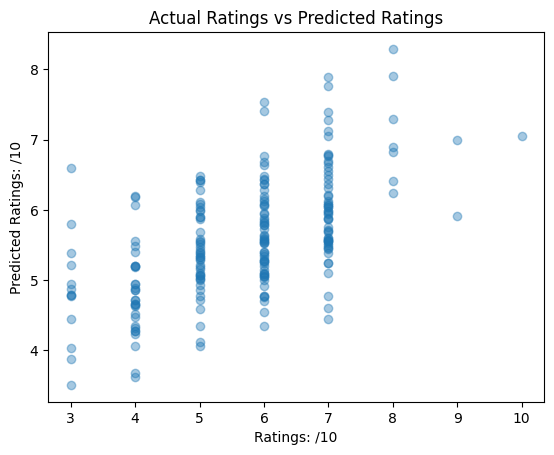

In [4]:

#? New stuff) Visualizing results with matplotlib
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Ratings: /10")
plt.ylabel("Predicted Ratings: /10")
plt.title("Actual Ratings vs Predicted Ratings")
plt.show() #* My Graph looks weird because My actual ratings are all whole numbers.. :(



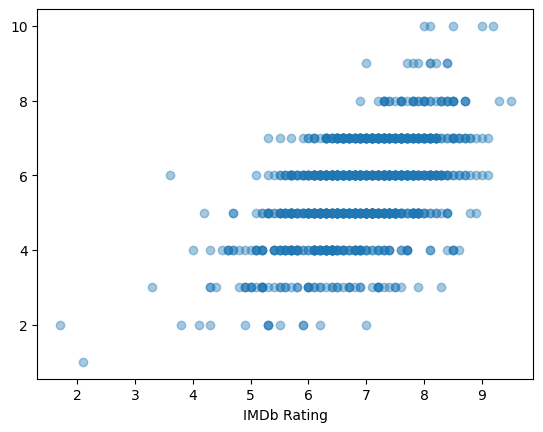

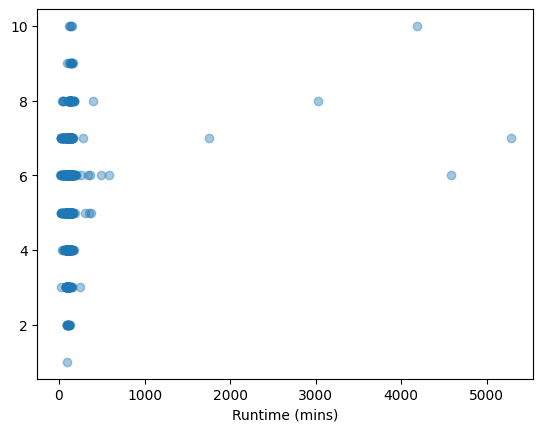

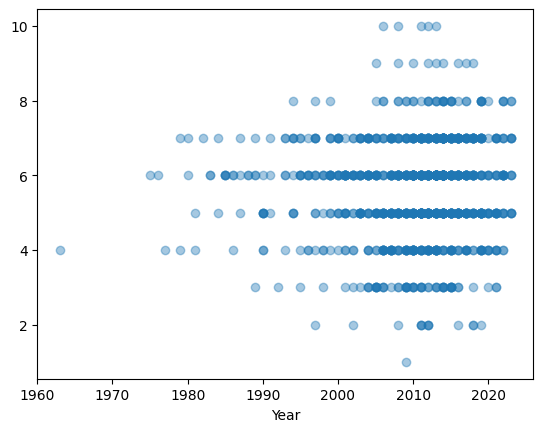

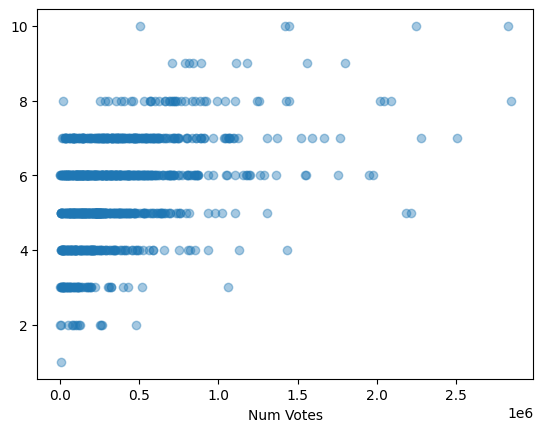

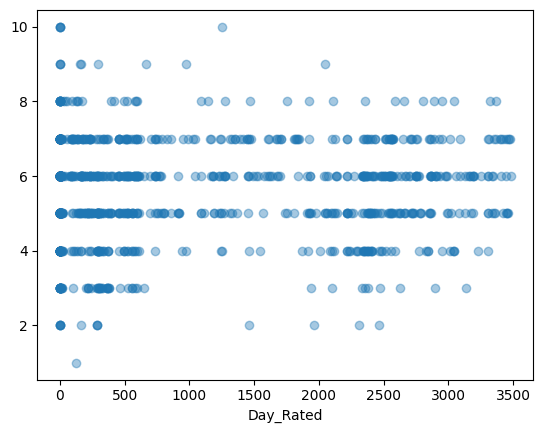

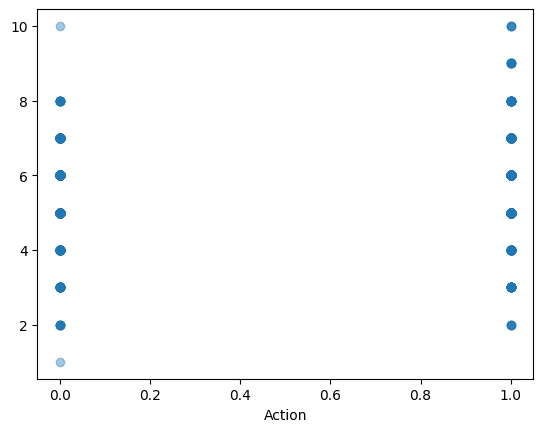

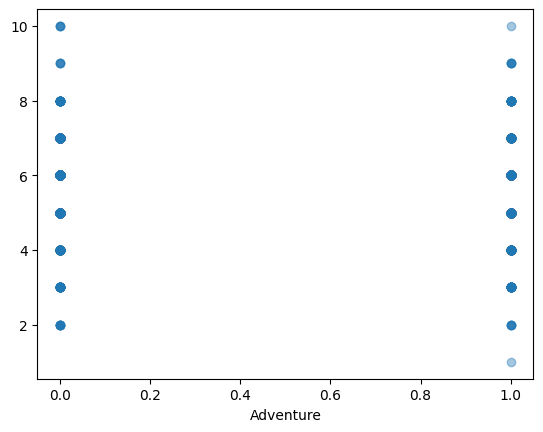

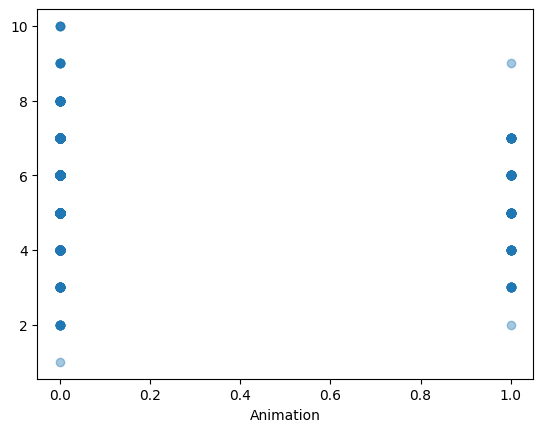

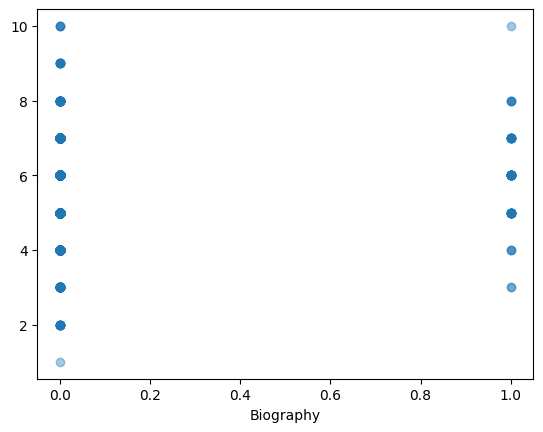

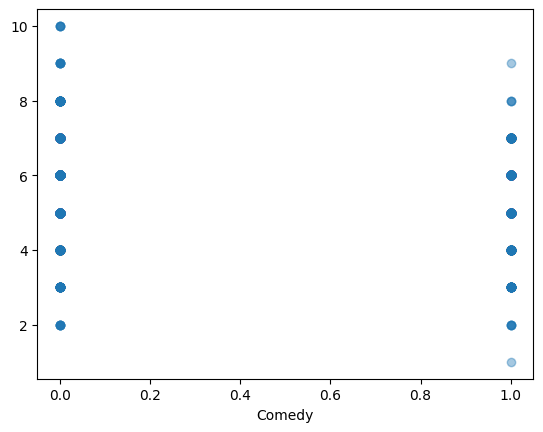

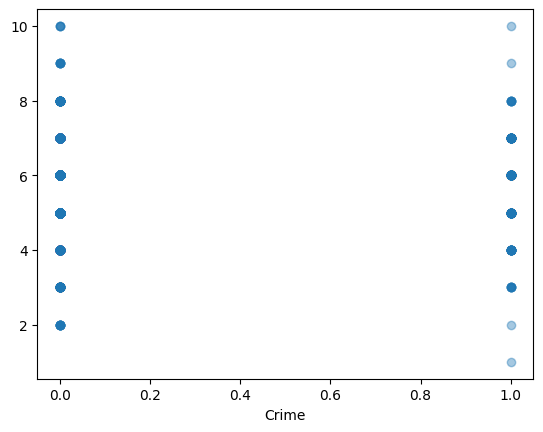

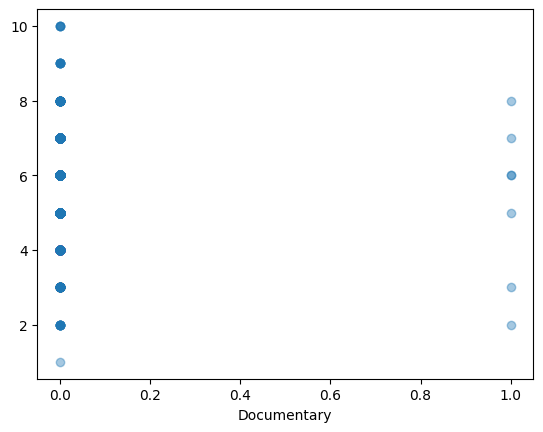

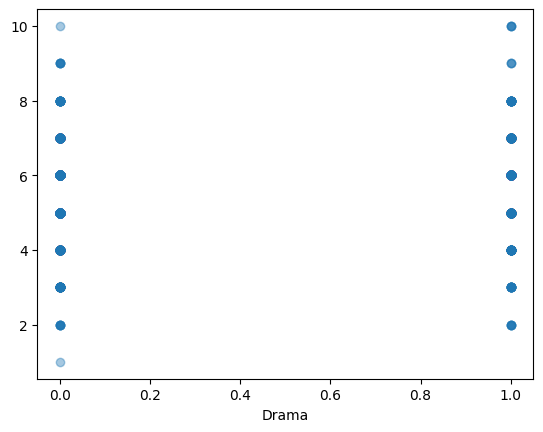

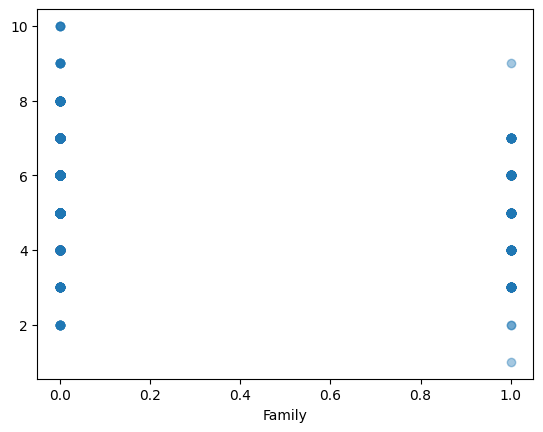

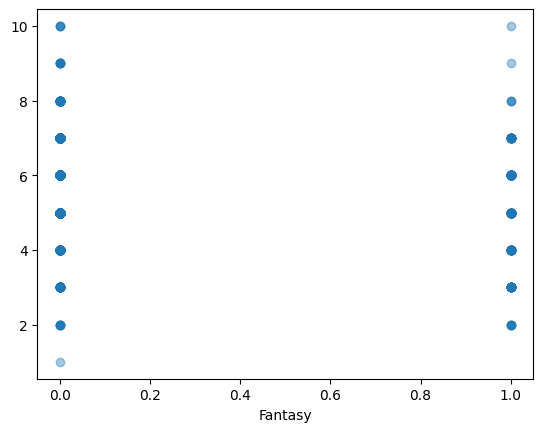

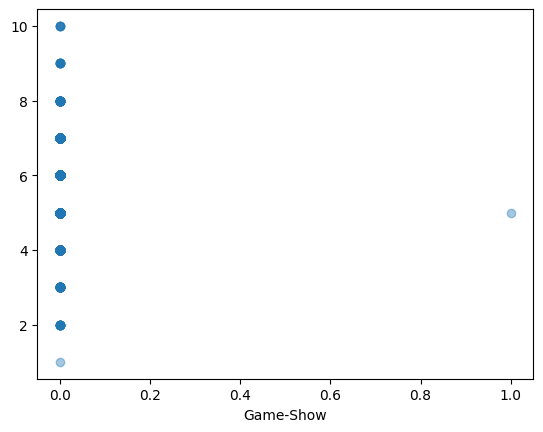

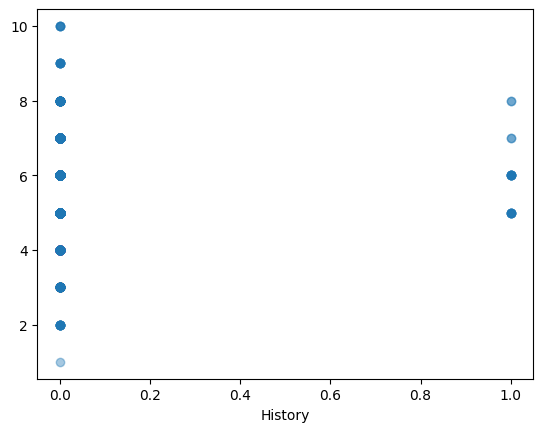

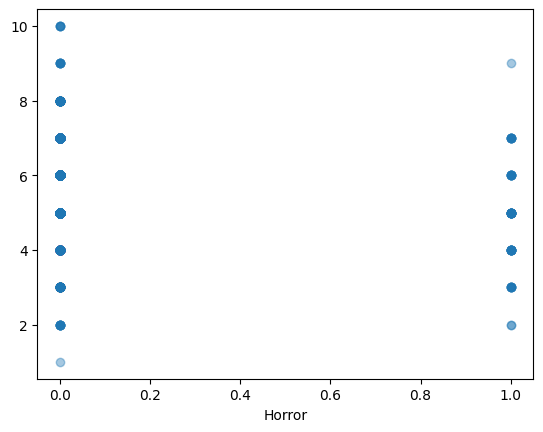

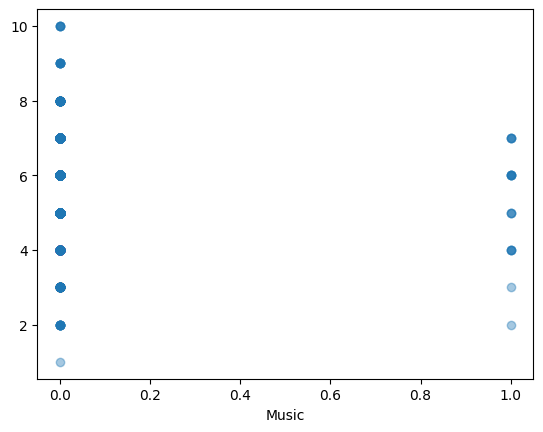

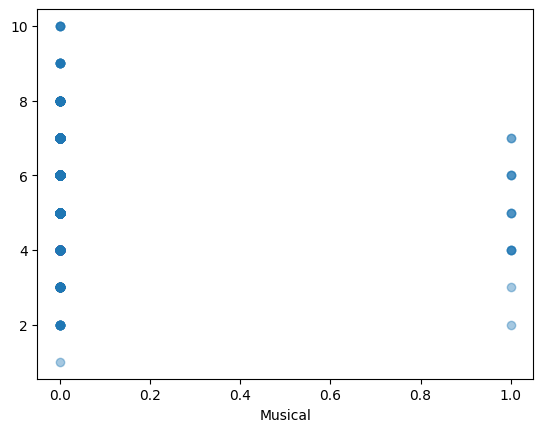

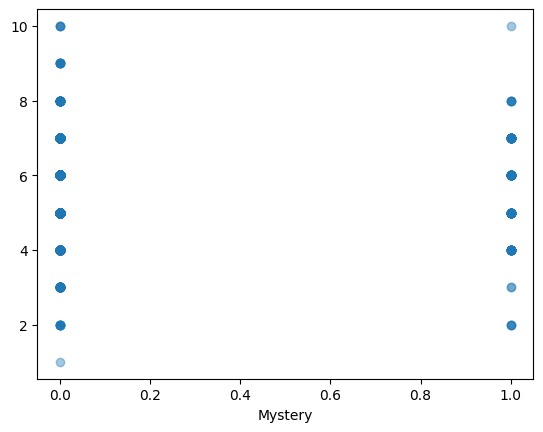

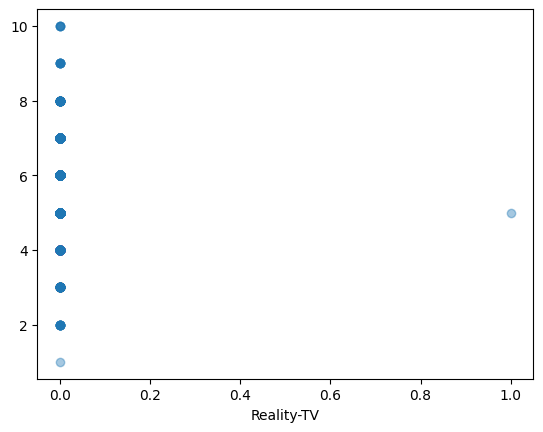

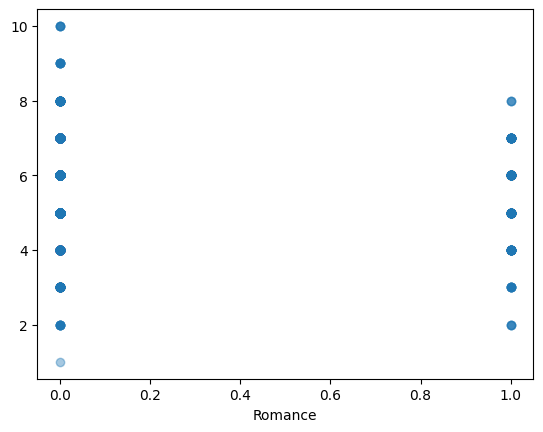

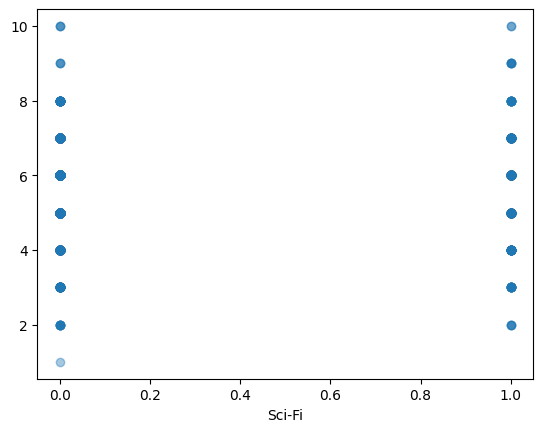

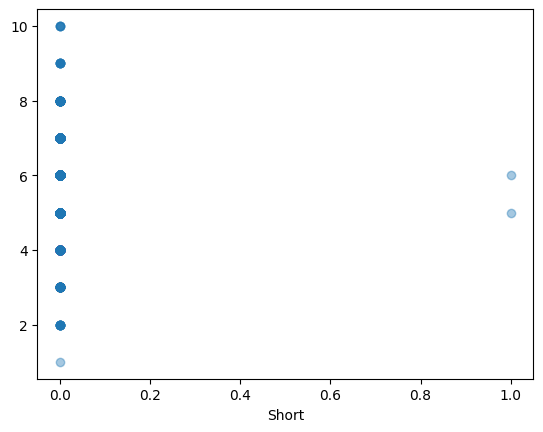

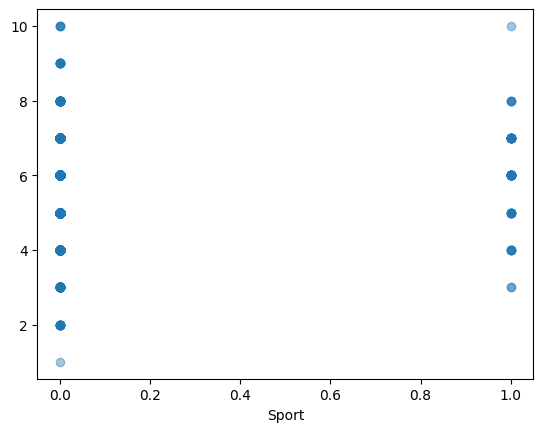

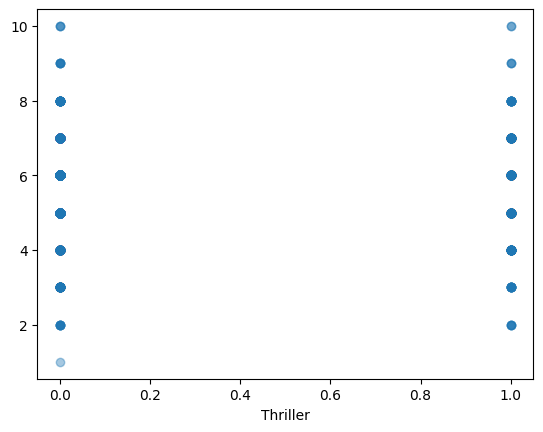

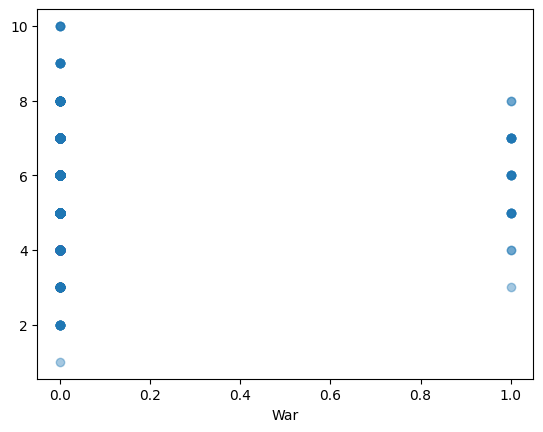

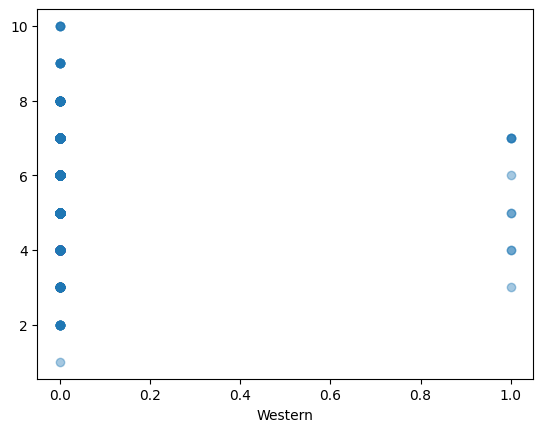

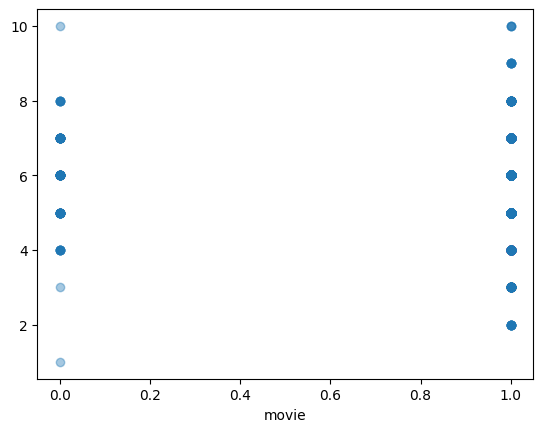

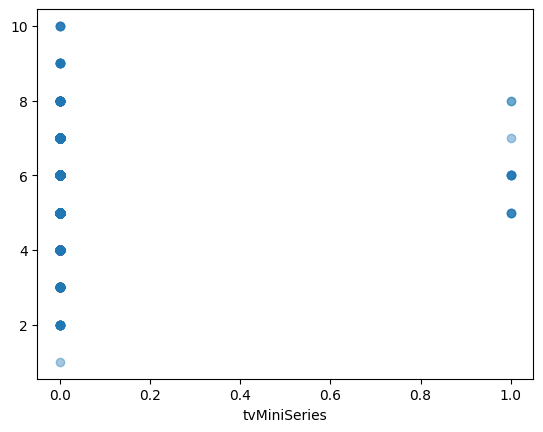

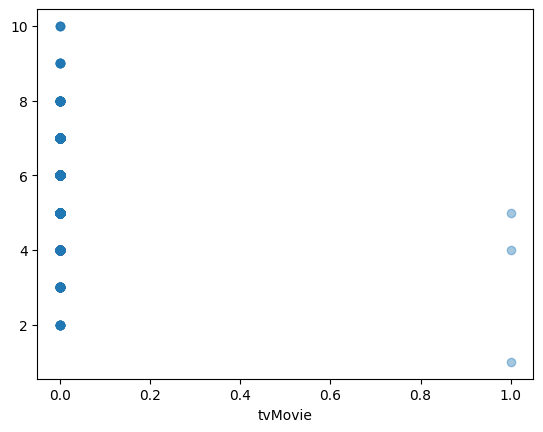

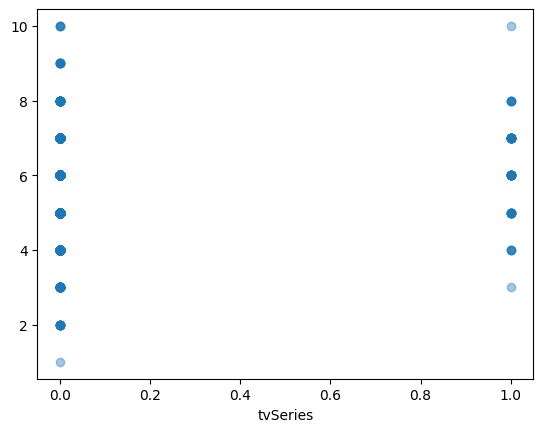

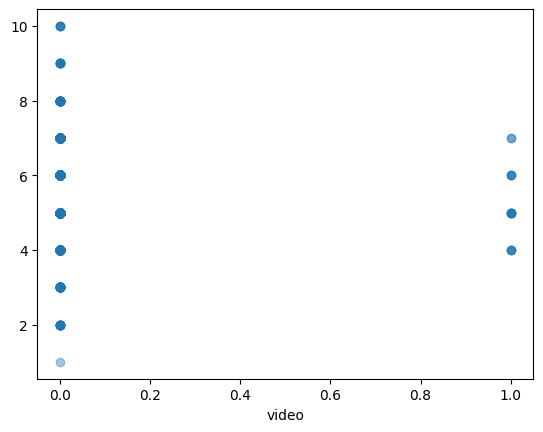

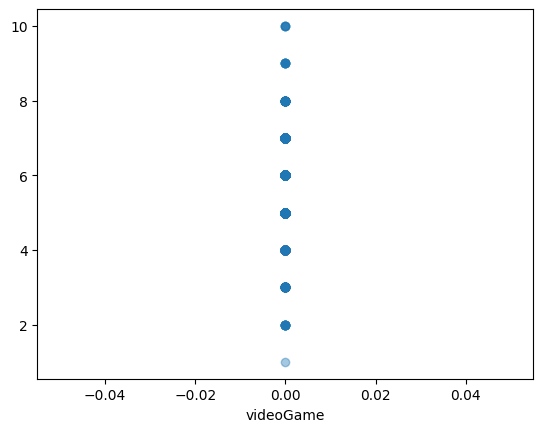

In [5]:

#? More visualizations
#* Let your boy build a lit function to view all the graphs and therefor correlations! (this is pretty lit!!)
def scatter_loop(df, var_list):
    for variable in var_list:
        plt.scatter(df[[variable]], df["Your Rating"], alpha = 0.4)
        plt.xlabel(variable)
        plt.show()
    return ""

print(scatter_loop(ratings_df, X)) #* comment this out for a sec

#! Runtime need to do z-score standardise/ normalize rather than min-max due to massive outliers!